## BERTScore Tutorial

In [1]:
# if you have not installed bert_score, it is very easy
# simply uncomment the line below to install through pip
#!pip install bert_score

In [2]:
# hide the loading messages
import logging
import transformers
transformers.tokenization_utils.logger.setLevel(logging.ERROR)
transformers.configuration_utils.logger.setLevel(logging.ERROR)
transformers.modeling_utils.logger.setLevel(logging.ERROR)

We will first demonstrate how to use the `score` function in `bert_score`, which is what you need to evaluate a set of machine generated outputs.

In [3]:
from bert_score import score

Inputs to `score` are a list of candidate sentences and a list of reference sentences. 

In [4]:
with open("hyps.txt") as f:
    cands = [line.strip() for line in f]

with open("refs.txt") as f:
    refs = [line.strip() for line in f]

Let's have a look.

In [5]:
cands[0]

'28-year-old chef found dead in San Francisco mall'

We are now ready to call the score function. Besides candidates and references, we need to speicify the bert model we are using. Since we are dealing with English sentences, we will use the *bert-base-uncased* model.

In [6]:
P, R, F1 = score(cands, refs, lang='en', verbose=True)

calculating scores...
computing bert embedding.



computing greedy matching.



done in 17.41 seconds, 172.54 sentences/sec


The outputs of the `score` function are Tensors of precision, recall, and F1 respectively. Each Tensor has the same number of items with the candidate and reference lists. Each item in the list is a scalar, representing the score for the corresponding candidates and references.

In [7]:
F1

tensor([0.9865, 0.9768, 0.9185,  ..., 0.9429, 0.9821, 0.9744])

We can take the average of all candidate reference pairs to be the system level score.

In [8]:
print(f"System level F1 score: {F1.mean():.3f}")

System level F1 score: 0.950


It might also be very interestig to see the distribution of BERTScore.

In [9]:
import matplotlib.pyplot as plt

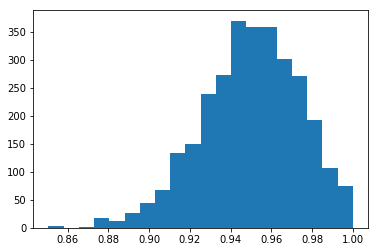

In [10]:
plt.hist(F1, bins=20)
plt.show()

To understand our translation system better, we can visualize the matchings in BERTScore.

In [11]:
from bert_score import plot_example

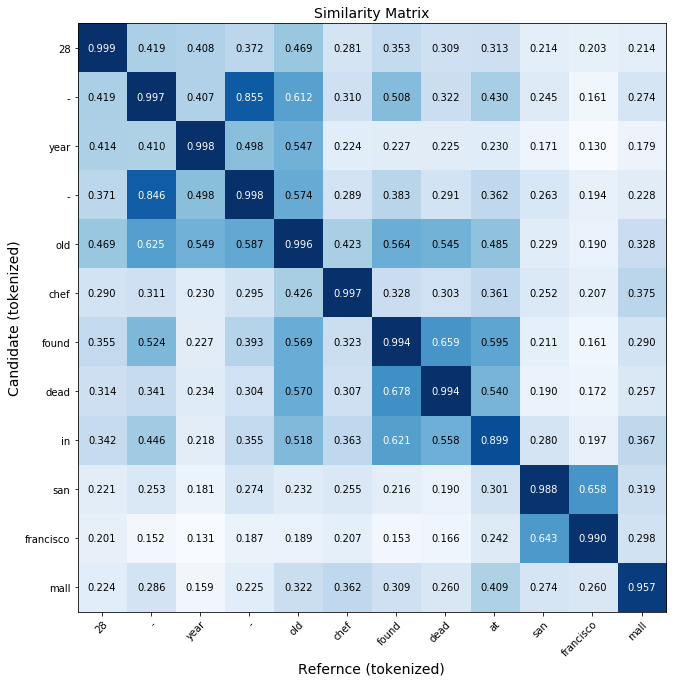

In [12]:
plot_example(cands[0], refs[0], model_type='bert-base-uncased')